## Linear Regression Overview
Linear Regression is a statistical method used to model the relationship between a dependent variable 
𝑌(output) and one or more independent variables X (input). The simplest form is Simple Linear Regression, which deals with a single input feature.





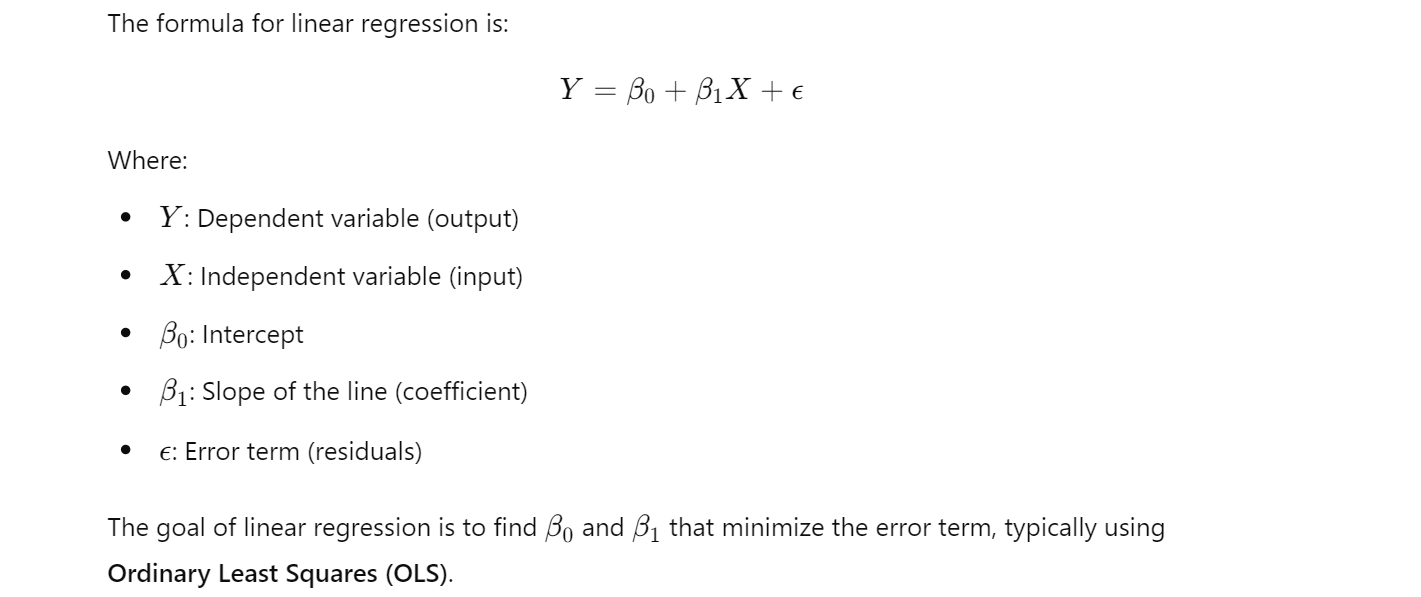



### Assumptions of Linear Regression
- Linearity: The relationship between independent and dependent variables is linear.
- Independence: Observations are independent.
- Homoscedasticity: Constant variance of residuals across all levels of 𝑋
- Normality of Residuals: Residuals should be approximately normally distributed.
- No Multicollinearity (for multiple regression): Independent variables should not be highly correlated.


## Implementation Using NumPy


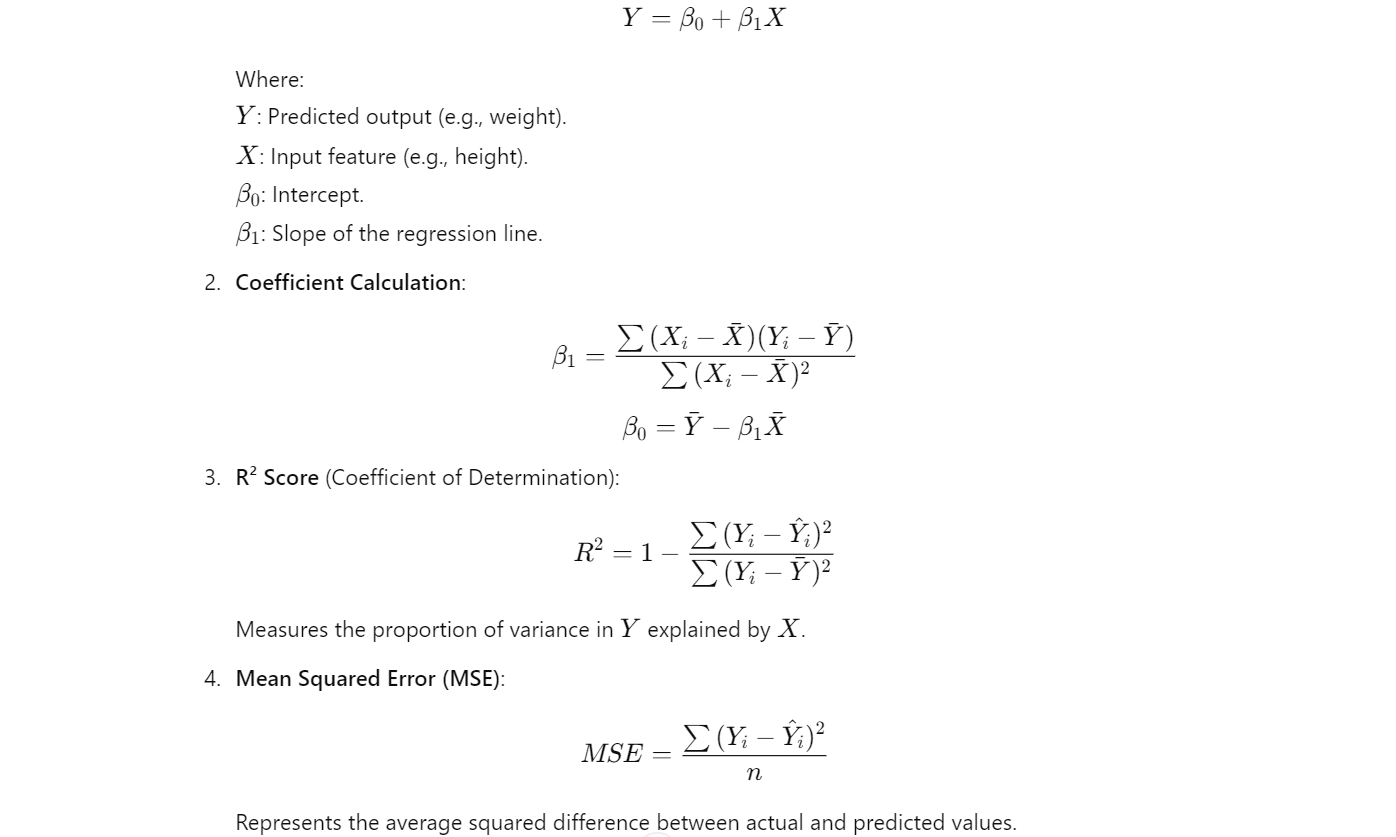

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data
np.random.seed(42)
heights = np.random.normal(180, 20, 30)  # Heights in cm
weights = 0.5 * heights + np.random.normal(0, 5, 30)  # Generate weights with some noise


In [13]:
heights

array([189.93428306, 177.23471398, 192.95377076, 210.46059713,
       175.31693251, 175.31726086, 211.58425631, 195.34869458,
       170.61051228, 190.85120087, 170.73164614, 170.68540493,
       184.83924543, 141.73439511, 145.50164335, 168.75424942,
       159.74337759, 186.28494665, 161.83951849, 151.75392597,
       209.31297538, 175.48447399, 181.35056409, 151.50503628,
       169.11234551, 182.21845179, 156.98012845, 187.51396037,
       167.9872262 , 174.166125  ])

In [14]:
weights

array([ 91.95860847,  97.87874791,  96.40939926,  99.94174392,
        91.77119081,  81.55441218, 106.83644613,  87.87599667,
        78.6643259 ,  96.40990662,  89.05815597,  86.19954387,
        91.8413813 ,  69.36167908,  65.35821172,  80.77790367,
        77.56849494,  98.42808446,  82.63785069,  67.06176221,
       106.27690754,  85.81682559,  87.29067205,  78.81089958,
        89.71117037,  95.76562649,  74.29397661,  92.2109183 ,
        85.64993026,  91.96078814])

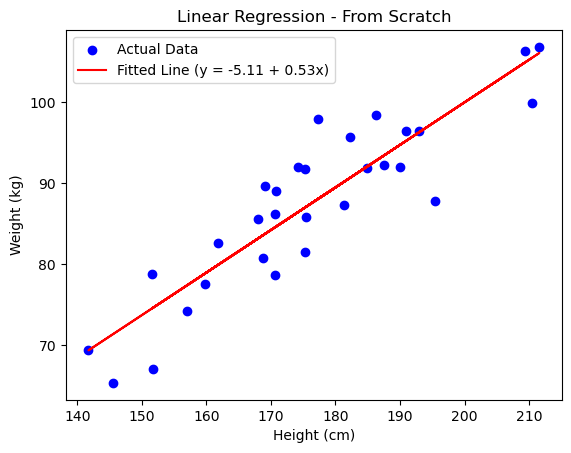

Intercept (Beta 0): -5.11
Slope (Beta 1): 0.53


In [15]:
# Implementing Linear Regression using Numpy
def linear_regression(x, y):
    # Calculate coefficients
    n = len(x)
    x_mean, y_mean = np.mean(x), np.mean(y)
    beta_1 = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean)**2)
    beta_0 = y_mean - beta_1 * x_mean
    return beta_0, beta_1

# Calculate coefficients
intercept, slope = linear_regression(heights, weights)

# Predicted values
predicted_weights = intercept + slope * heights

# Visualizing the results
plt.scatter(heights, weights, label="Actual Data", color="blue")
plt.plot(heights, predicted_weights, label=f"Fitted Line (y = {intercept:.2f} + {slope:.2f}x)", color="red")
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.title("Linear Regression - From Scratch")
plt.legend()
plt.show()

print(f"Intercept (Beta 0): {intercept:.2f}")
print(f"Slope (Beta 1): {slope:.2f}")


In [16]:
## Given ()

-5.11+0.53*(150)

74.39

### Implementation Using sklearn
To implement Linear Regression with sklearn, we use the LinearRegression class from sklearn.linear_model.

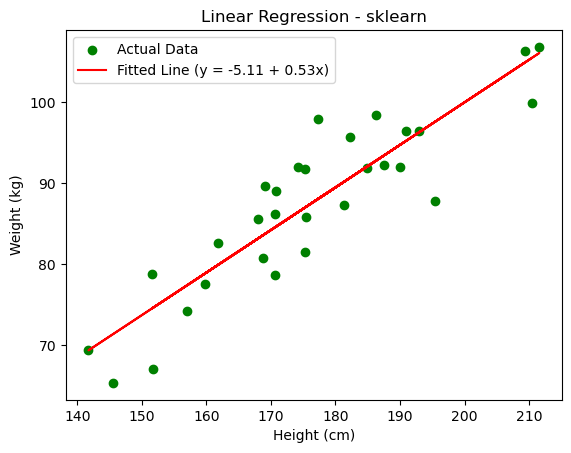

Intercept: -5.11
Slope (Coefficient): 0.53


In [17]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Data Preparation
heights = heights.reshape(-1, 1)  # Reshape for sklearn (2D input required)
weights = weights

# Create and train the model
weight_pred = LinearRegression()
weight_pred.fit(heights, weights)

# Predictions
predicted_weights = weight_pred.predict(heights)

# Visualizing the results
plt.scatter(heights, weights, label="Actual Data", color="green")
plt.plot(heights, predicted_weights, label=f"Fitted Line (y = {weight_pred.intercept_:.2f} + {weight_pred.coef_[0]:.2f}x)", color="red")
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.title("Linear Regression - sklearn")
plt.legend()
plt.show()

print(f"Intercept: {weight_pred.intercept_:.2f}")
print(f"Slope (Coefficient): {weight_pred.coef_[0]:.2f}")


### Examples of Linear Regression
Linear regression is widely used in various fields. Here are some examples:

- Predicting House Prices
Input: Square footage, number of bedrooms.
Output: Price of the house.

- Salary Prediction
Input: Years of experience.
Output: Annual salary.

- Health Analysis
Input: Body Mass Index (BMI).
Output: Risk of certain diseases.

- Advertising Effectiveness
Input: Money spent on advertising.
Output: Sales revenue.

## Quick Practice Predicting Attrition Rate of a Company

Year	Attrition Rate (%)
2004	12.5
2005	13.2
2006	11.8
2007	12.1
2008	14.0
2009	15.5
2010	14.8
2011	13.3
2012	13.0
2013	12.7
2014	11.5
2015	11.0
2016	12.2
2017	12.9
2018	13.5
2019	14.0
2020	16.5
2021	18.0
2022	17.5
2023	16.0


### You need to predict Attrition equation and alos Attrition rate for 2025 and 2026.

In [18]:
import numpy as np
import pandas as pd

# Creating the dataset
years = np.arange(2004, 2024)  # 20 years of data
attrition_rates = [12.5, 13.2, 11.8, 12.1, 14.0, 15.5, 14.8, 13.3, 13.0, 12.7, 
                   11.5, 11.0, 12.2, 12.9, 13.5, 14.0, 16.5, 18.0, 17.5, 16.0]

data = pd.DataFrame({"Year": years, "AttritionRate": attrition_rates})
print(data.head())


   Year  AttritionRate
0  2004           12.5
1  2005           13.2
2  2006           11.8
3  2007           12.1
4  2008           14.0


In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Reshape data for sklearn
years_reshaped = years.reshape(-1, 1)

# Create and train the model
attrition_rate = LinearRegression()
attrition_rate.fit(years_reshaped, attrition_rates)

# Predictions
predicted_attrition = attrition_rate.predict(years_reshaped)

# Metrics
r2_sklearn = r2_score(attrition_rates, predicted_attrition_sklearn)
mse_sklearn = mean_squared_error(attrition_rates, predicted_attrition_sklearn)

print(f"Sklearn Intercept: {attrition_rate.intercept_:.2f}")
print(f"Sklearn Slope: {attrition_rate.coef_[0]:.2f}")
print(f"Sklearn R² Score: {r2_sklearn:.2f}")
print(f"Sklearn MSE: {mse_sklearn:.2f}")


Sklearn Intercept: -358.32
Sklearn Slope: 0.18
Sklearn R² Score: 0.30
Sklearn MSE: 2.62


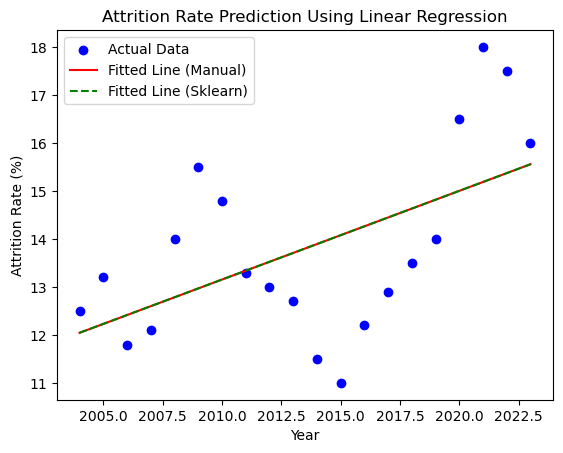

In [23]:
import matplotlib.pyplot as plt

plt.scatter(years, attrition_rates, label="Actual Data", color="blue")
plt.plot(years, predicted_attrition, label="Fitted Line (Manual)", color="red")
plt.plot(years, predicted_attrition_sklearn, label="Fitted Line (Sklearn)", color="green", linestyle="dashed")
plt.xlabel("Year")
plt.ylabel("Attrition Rate (%)")
plt.title("Attrition Rate Prediction Using Linear Regression")
plt.legend()
plt.show()


Attrition_Rate = .18(Year)+ (-358) +2.62 
